<a href="https://colab.research.google.com/github/vash4/My-Project/blob/master/Copy_of_Copy_of_Copy_of_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
# csv file
df=pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from google.colab import files
upload=files.upload()

Saving test.csv to test (2).csv


In [ ]:
test_df=pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Missing Data


We can use seaborn using heatmap so we can find out missing valuels

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


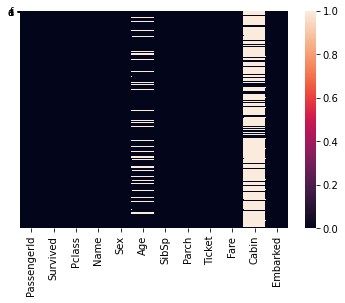

In [ ]:
sns.heatmap(df.isnull(),yticklabels='false',cbar='false')

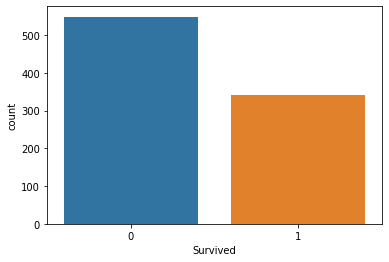

In [ ]:
sns.set_style=('whitegrid')
sns.countplot(x='Survived',data=df)

In [ ]:
x=pd.get_dummies(df['Sex'],drop_first=True)
print(x.head(5))

   male
0     1
1     0
2     0
3     0
4     1


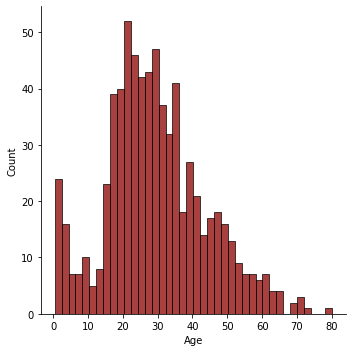

In [ ]:
sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


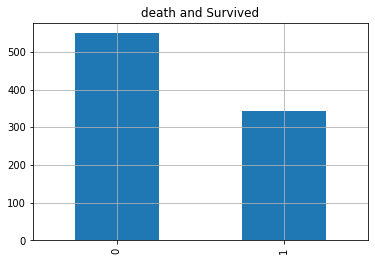

In [ ]:
df['Survived'].value_counts().plot(kind='bar',title='death and Survived',grid=True)
plt.show()

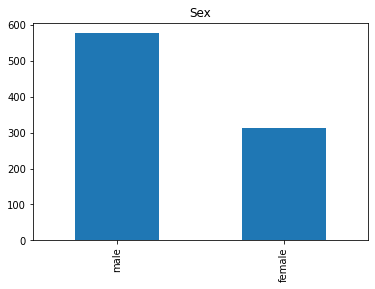

In [ ]:
df['Sex'].value_counts().plot(kind='bar',title='Sex')
plt.show()

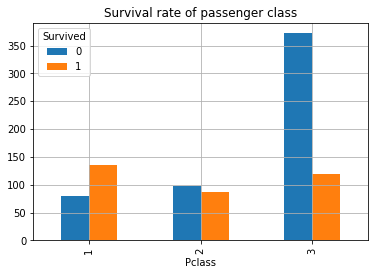

In [ ]:
x=pd.crosstab(df['Pclass'],df['Survived'])
x.plot(kind='bar',title='Survival rate of passenger class',grid=True)
plt.show()

In [ ]:
test_df=pd.get_dummies(test_df)
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Master. Eugene Joseph","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)","Name_Aks, Master. Philip Frank","Name_Aldworth, Mr. Charles Augustus","Name_Allison, Mr. Hudson Joshua Creighton","Name_Andersen, Mr. Albert Karvin","Name_Andersson, Miss. Ida Augusta Margareta","Name_Andersson, Mr. Johan Samuel","Name_Andrew, Mr. Frank Thomas","Name_Angheloff, Mr. Minko","Name_Angle, Mr. William A","Name_Aronsson, Mr. Ernst Axel Algot","Name_Ashby, Mr. John","Name_Asplund, Master. Carl Edgar","Name_Asplund, Master. Filip Oscar","Name_Asplund, Mr. Carl Oscar Vilhelm Gustafsson","Name_Asplund, Mr. Johan Charles","Name_Assaf Khalil, Mrs. Mariana (Miriam"")""","Name_Assaf, Mr. Gerios","Name_Assam, Mr. Ali","Name_Astor, Col. John Jacob","Name_Baccos, Mr. Raffull","Name_Badman, Miss. Emily Louisa","Name_Baimbrigge, Mr. Charles Robert","Name_Barry, Miss. Julia","Name_Beattie, Mr. Thomson","Name_Beauchamp, Mr. Henry James","Name_Becker, Miss. Ruth Elizabeth","Name_Becker, Mrs. Allen Oliver (Nellie E Baumgardner)","Name_Bentham, Miss. Lilian W","Name_Betros, Master. Seman",...,Cabin_C62 C64,Cabin_C7,Cabin_C78,Cabin_C80,Cabin_C85,Cabin_C86,Cabin_C89,Cabin_C97,Cabin_D,Cabin_D10 D12,Cabin_D15,Cabin_D19,Cabin_D21,Cabin_D22,Cabin_D28,Cabin_D30,Cabin_D34,Cabin_D37,Cabin_D38,Cabin_D40,Cabin_D43,Cabin_E31,Cabin_E34,Cabin_E39 E41,Cabin_E45,Cabin_E46,Cabin_E50,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
416,1308,3,NaN,0,0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
test_df.isna().any()

PassengerId    False
Pclass         False
Age             True
SibSp          False
Parch          False
               ...  
Cabin_F4       False
Cabin_G6       False
Embarked_C     False
Embarked_Q     False
Embarked_S     False
Length: 868, dtype: bool

In [ ]:
df =df.fillna(lambda x: x.median())

In [ ]:
df= df.fillna(method='ffill')

In [ ]:
test_df.dropna().shape

(331, 868)

In [ ]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Master. Eugene Joseph","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)","Name_Aks, Master. Philip Frank","Name_Aldworth, Mr. Charles Augustus","Name_Allison, Mr. Hudson Joshua Creighton","Name_Andersen, Mr. Albert Karvin","Name_Andersson, Miss. Ida Augusta Margareta","Name_Andersson, Mr. Johan Samuel","Name_Andrew, Mr. Frank Thomas","Name_Angheloff, Mr. Minko","Name_Angle, Mr. William A","Name_Aronsson, Mr. Ernst Axel Algot","Name_Ashby, Mr. John","Name_Asplund, Master. Carl Edgar","Name_Asplund, Master. Filip Oscar","Name_Asplund, Mr. Carl Oscar Vilhelm Gustafsson","Name_Asplund, Mr. Johan Charles","Name_Assaf Khalil, Mrs. Mariana (Miriam"")""","Name_Assaf, Mr. Gerios","Name_Assam, Mr. Ali","Name_Astor, Col. John Jacob","Name_Baccos, Mr. Raffull","Name_Badman, Miss. Emily Louisa","Name_Baimbrigge, Mr. Charles Robert","Name_Barry, Miss. Julia","Name_Beattie, Mr. Thomson","Name_Beauchamp, Mr. Henry James","Name_Becker, Miss. Ruth Elizabeth","Name_Becker, Mrs. Allen Oliver (Nellie E Baumgardner)","Name_Bentham, Miss. Lilian W","Name_Betros, Master. Seman",...,Cabin_C62 C64,Cabin_C7,Cabin_C78,Cabin_C80,Cabin_C85,Cabin_C86,Cabin_C89,Cabin_C97,Cabin_D,Cabin_D10 D12,Cabin_D15,Cabin_D19,Cabin_D21,Cabin_D22,Cabin_D28,Cabin_D30,Cabin_D34,Cabin_D37,Cabin_D38,Cabin_D40,Cabin_D43,Cabin_E31,Cabin_E34,Cabin_E39 E41,Cabin_E45,Cabin_E46,Cabin_E50,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
152,1044,3,60.5,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

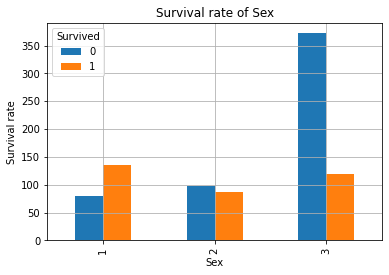

In [ ]:
x1=pd.crosstab(df['Pclass'],df['Survived'])
x1.plot(kind='bar',title='Survival rate of Sex', grid=True)
plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.show()

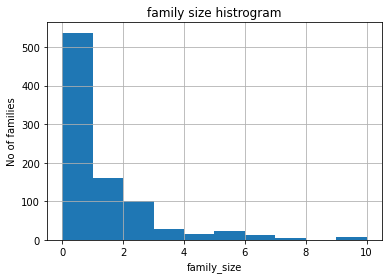

In [ ]:
df['family_size'] = df['SibSp'] + df ['Parch']
df ['family_size'] .hist (bins =10)
plt.xlabel('family_size')
plt.ylabel('No of families')
plt.title('family size histrogram')
plt.show()

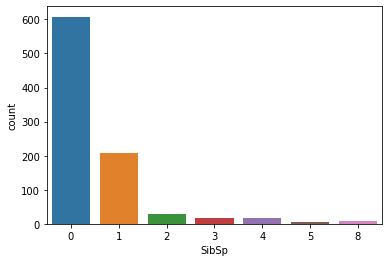

In [ ]:
sns.countplot(x='SibSp',data=df)

Data Cleaning

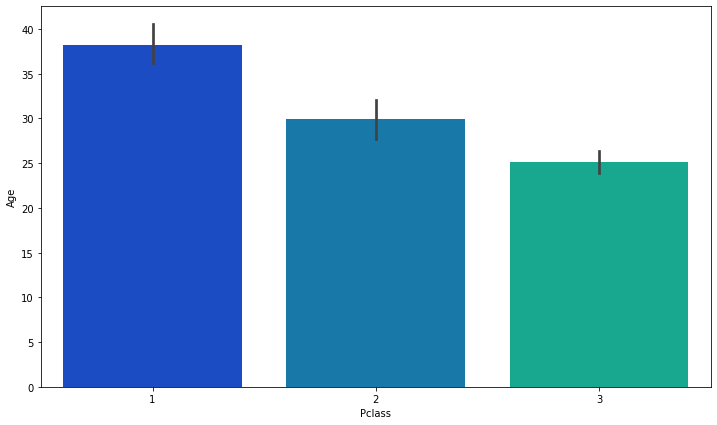

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Pclass',y='Age',data=df,palette='winter')

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [ ]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [ ]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),
                                               df['Survived'],test_size=0.30,
                                               random_state=101)

In [ ]:
LR= LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print(x_train)
print(x_test)

     PassengerId  Pclass    Age  SibSp  Parch     Fare
757          758       2  18.00      0      0  11.5000
310          311       1  24.00      0      0  83.1583
469          470       3   0.75      2      1  19.2583
331          332       1  45.50      0      0  28.5000
752          753       3  33.00      0      0   9.5000
..           ...     ...    ...    ...    ...      ...
98            99       2  34.00      0      1  23.0000
753          754       3  23.00      0      0   7.8958
724          725       1  27.00      1      0  53.1000
422          423       3  29.00      0      0   7.8750
663          664       3  36.00      0      0   7.4958

[498 rows x 6 columns]
     PassengerId  Pclass   Age  SibSp  Parch      Fare
225          226       3  22.0      0      0    9.3500
449          450       1  52.0      0      0   30.5000
750          751       2   4.0      1      1   23.0000
261          262       3   3.0      4      2   31.3875
283          284       3  19.0      0    

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,pred)
cm

array([[102,  26],
       [ 40,  46]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac=accuracy_score(y_test,pred)
ac

0.6915887850467289

In [ ]:
pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])